# UTS BIOMEDIKA KELAS A


*   NAMA : AMELIA NUR SEPTIYASARI
*   NIM  : 200411100039
*   KELAS: BIOMEDIKA A



## SOAL

Buat program untuk
1. Membentuk matrik GLCM dari salah satu channel (Red, atau Green, atau Blue), atau gray scale nya dari citra ALL-IDB2
2. Hitung fitur Energy, contrast, correlation, homogeneity dengan parameter jarak=1, dan sudut=0, 45, 90, 135 derajat.
3. Simpan hasilnya dalam bentuk dataframe

Note
Lebih baik lagi kalau data yang diproses, disegmentasi terlebih dahulu

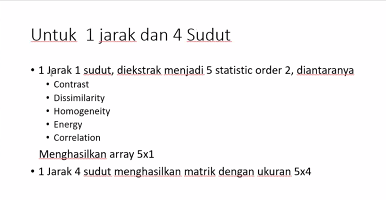

##Menghubungkan ke google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Melakukan import modul

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd
import os


## path untuk sample citra ALL benign dan early

In [ ]:
path_benign = ('/content/drive/MyDrive/Biomedika/ALL/Benign/')
path_early = ('/content/drive/MyDrive/Biomedika/ALL/Early/')     

## Tahapan membaca semua citra(Dalam bentuk grayscale) yang ada dalam folder dan Segmentasi


### Citra ALL Benign

In [ ]:
# list untuk menampung citra dan nama citra
benign_images = []
image_names = []

# membaca semua citra dalam folder
for filename in os.listdir(path_benign):
    # membaca citra dan menambahkannya ke list
    img = cv2.imread(os.path.join(path_benign, filename))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       
     # mengambil nilai threshold dengan metode Otsu
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # mengaplikasikan threshold pada citra
    segmented = cv2.bitwise_and(gray, gray, mask=thresh)

    # diubah menjadi matriks 5*4
    resize = cv2.resize(segmented, (4,5))
    benign_images.append(resize)
       
    # menambahkan nama citra ke list
    image_names.append(filename)

# menampilkan jumlah citra yang berhasil dibaca
print("Jumlah citra yang berhasil disegmentasi:", len(benign_images))


Jumlah citra yang berhasil disegmentasi: 504


## Mengecek apa ukuran matriks image sudah 5*4

In [ ]:

print(benign_images[2].shape)
print('\n')
print(benign_images[2])

(5, 4)


[[  0   0   0   0]
 [  0 243   0   0]
 [  0  51 226   0]
 [251   0 224  75]
 [  0   0 105 255]]


### Citra ALL Early

In [ ]:
# list untuk menampung citra dan nama citra
early_images = []
images_names = []

# membaca semua citra dalam folder
for filename in os.listdir(path_early):
    # membaca citra dan menambahkannya ke list
    img = cv2.imread(os.path.join(path_early, filename))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       
     # mengambil nilai threshold dengan metode Otsu
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # mengaplikasikan threshold pada citra
    segmented = cv2.bitwise_and(gray, gray, mask=thresh)

    # diubah menjadi matriks 5*4
    resize = cv2.resize(segmented, (4,5))
    early_images.append(resize)
       
    # menambahkan nama citra ke list
    images_names.append(filename)

# menampilkan jumlah citra yang berhasil dibaca
print("Jumlah citra yang berhasil disegmentasi:", len(early_images))


Jumlah citra yang berhasil disegmentasi: 985


In [ ]:

print(early_images[4].shape)
print('\n')
print(early_images[4])

(5, 4)


[[  0 244   0   0]
 [  0 253 106 252]
 [251 240 251 226]
 [247 245 249   0]
 [243 238 252 237]]


## Menghitung properti GLCM

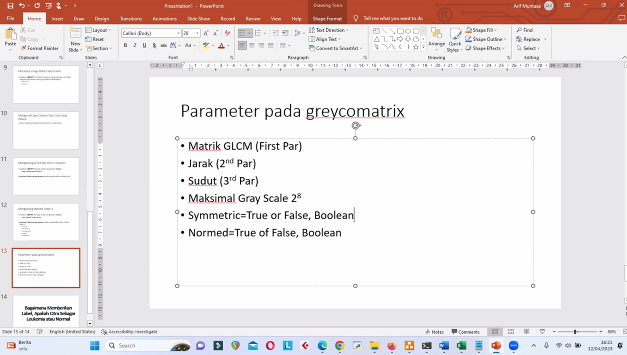

## Membuat fungsi menghitung properti GLCM sesuai dengan parameter yang diminta

In [ ]:
#Disini saya mengimpor fungsi yang dibutuhkan dari library skimage.feature, yaitu greycomatrix dan greycoprops.
from skimage.feature import greycomatrix, greycoprops

#Kemudian saya membuat fungsi hitung_glcm_semua_sudut dengan 7 parameter input:
#img adalah citra 2D grayscale sebagai array NumPy
#properti adalah sebuah list yang berisi nama-nama fitur GLCM yang ingin dihitung
#jarak adalah sebuah list yang berisi jarak antar pixel yang akan dihitung
#sudut adalah sebuah list yang berisi sudut-sudut di mana GLCM akan dihitung (sudut 0,45,90,135)
#level adalah jumlah level keabuan yang akan digunakan untuk menghitung GLCM
#imetris menentukan apakah GLCM yang dihasilkan simetris atau tidak
#dinormalisasi menentukan apakah GLCM yang dihasilkan dinormalisasi atau tidak

def hitung_glcm_semua_sudut(img, properti, jarak=[1], sudut=[0, np.pi/4, np.pi/2, 3*np.pi/4], level=256, simetris=True, dinormalisasi=True):
    #Menggunakan fungsi greycomatrix untuk menghitung GLCM dari citra dengan parameter input yang telah diberikan.
    glcm = greycomatrix(img, 
                        distances=jarak, 
                        angles=sudut, 
                        levels=level,
                        symmetric=simetris, 
                        normed=dinormalisasi)
    
    #Membuat sebuah list kosong bernama fitur.
    #Menggunakan sebuah list comprehension untuk membuat list properti_glcm yang berisi nilai-nilai fitur GLCM yang dihitung dengan menggunakan fungsi greycoprops dari setiap properti yang ada pada list properti.
    fitur = []
    properti_glcm = [prop for name in properti for prop in greycoprops(glcm, name)[0]]
    
    #Menggunakan sebuah loop for untuk memasukkan setiap item dari list properti_glcm ke dalam list fitur.
    #Mengembalikan list fitur yang berisi nilai-nilai fitur GLCM yang telah dihitung.
    for item in properti_glcm:
        fitur.append(item)
    return fitur


     

### Hitung properti GLCM untuk citra ALL Benign

In [ ]:
#Mendefinisikan sebuah list yang bernama "properti" yang berisi beberapa string yaitu 'energy', 'contrast', 'dissimilarity', 'correlation', dan 'homogeneity'.
#List ini digunakan untuk menentukan properti GLCM apa saja yang akan dihitung.
properti = ['energy','contrast','dissimilarity', 'correlation', 'homogeneity']

#Mendefinisikan sebuah list kosong "glcm_semua_sudut" yang akan digunakan untuk menyimpan nilai GLCM yang akan dihitung dari setiap gambar pada "benign_images". 
#Kemudian, dilakukan looping untuk setiap gambar pada "benign_images". 
#Pada setiap iterasi, fungsi "hitung_glcm_semua_sudut" dipanggil untuk menghitung nilai GLCM dari gambar tersebut dengan menggunakan semua sudut dan properti yang telah ditentukan sebelumnya. 
#Hasilnya disimpan dalam list "glcm_semua_sudut".
glcm_semua_sudut = []
for img in benign_images:
    glcm_semua_sudut.append(
        hitung_glcm_semua_sudut(img, 
                                properti=properti)
                            )

#Mendefinisikan sebuah list kosong "kolom" yang akan digunakan untuk menyimpan nama kolom dataframe. 
#Kemudian, mendefinisikan list "sudut" yang berisi beberapa sudut (0, 45, 90, 135) yang digunakan untuk menghitung GLCM. 
#Selanjutnya, dilakukan looping untuk setiap properti pada list "properti" dan looping untuk setiap sudut pada list "sudut".
#Pada setiap iterasi, string yang berisi nama properti dan sudut digabungkan dan disimpan dalam list "kolom".
kolom = []
sudut = ['0', '45', '90','135']
for name in properti :
    for sud in sudut:
        kolom.append(name + " untuk sudut " + sud)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/

### Hitung properti GCLM untuk citra ALL Early

In [ ]:
#Mendefinisikan sebuah list yang bernama "properti" yang berisi beberapa string yaitu 'energy', 'contrast', 'dissimilarity', 'correlation', dan 'homogeneity'.
#List ini digunakan untuk menentukan properti GLCM apa saja yang akan dihitung.
properti = ['energy','contrast','dissimilarity', 'correlation', 'homogeneity']

#Mendefinisikan sebuah list kosong "glcm_semua_sudut2" yang akan digunakan untuk menyimpan nilai GLCM yang akan dihitung dari setiap gambar pada "benign_images". 
#Kemudian, dilakukan looping untuk setiap gambar pada "early_images". 
#Pada setiap iterasi, fungsi "hitung_glcm_semua_sudut" dipanggil untuk menghitung nilai GLCM dari gambar tersebut dengan menggunakan semua sudut dan properti yang telah ditentukan sebelumnya. 
#Hasilnya disimpan dalam list "glcm_semua_sudut2".
glcm_semua_sudut2 = []
for img in early_images:
    glcm_semua_sudut2.append(
        hitung_glcm_semua_sudut(img, 
                                properti=properti)

#Mendefinisikan sebuah list kosong "kolom" yang akan digunakan untuk menyimpan nama kolom dataframe. 
#Kemudian, mendefinisikan list "sudut" yang berisi beberapa sudut (0, 45, 90, 135) yang digunakan untuk menghitung GLCM. 
#Selanjutnya, dilakukan looping untuk setiap properti pada list "properti" dan looping untuk setiap sudut pada list "sudut".
#Pada setiap iterasi, string yang berisi nama properti dan sudut digabungkan dan disimpan dalam list "kolom".                            )
kolom = []
sudut = ['0', '45', '90','135']
for name in properti :
    for sud in sudut:
        kolom.append(name + " untuk sudut " + sud)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/

## Menampilkan hasil properti GLCM menggunakan dataframe

### Hasil properti GLCM citra ALL Benign

In [ ]:
#Membuat DataFrame untuk GLCM 
#DataFrame diberi nama "glcm_benign_df" dan diisi dengan data dari variable "glcm_semua_sudut" yang sudah dihitung sebelumnya. 
#DataFrame glcm_benign_df terdiri dari beberapa kolom yang telah ditentukan sebelumnya oleh variable "kolom" yang dibuat dari properti GLCM dan sudut yang diukur.
glcm_benign_df = pd.DataFrame(glcm_semua_sudut, 
                      columns = kolom)

#untuk menampilkan lima baris teratas dari DataFrame tersebut untuk memeriksa apakah proses pembuatan DataFrame berhasil dilakukan dengan benar.
glcm_benign_df.head(5)

,energy untuk sudut 0,energy untuk sudut 45,energy untuk sudut 90,energy untuk sudut 135,contrast untuk sudut 0,contrast untuk sudut 45,contrast untuk sudut 90,contrast untuk sudut 135,dissimilarity untuk sudut 0,dissimilarity untuk sudut 45,dissimilarity untuk sudut 90,dissimilarity untuk sudut 135,correlation untuk sudut 0,correlation untuk sudut 45,correlation untuk sudut 90,correlation untuk sudut 135,homogeneity untuk sudut 0,homogeneity untuk sudut 45,homogeneity untuk sudut 90,homogeneity untuk sudut 135
0,0.371184,0.263523,0.306186,0.386401,23424.600000,38289.833333,28592.1250,28358.750000,100.333333,161.833333,122.2500,119.250000,0.184719,-0.311163,0.019256,-0.009541,0.335766,0.167686,0.254518,0.425009
1,0.194365,0.228218,0.202523,0.204124,537.600000,783.416667,794.5625,433.833333,18.000000,20.750000,22.8125,15.833333,0.227675,0.003986,-0.158918,0.321959,0.076700,0.172426,0.072884,0.070301
2,0.371184,0.372678,0.405046,0.338502,24753.533333,15804.666667,20486.3750,30341.916667,121.133333,85.166667,99.3750,138.916667,-0.204056,0.306691,0.046573,-0.444767,0.333379,0.333756,0.387547,0.250136
3,0.194365,0.204124,0.182217,0.212459,8061.400000,10226.666667,4066.2500,5317.166667,45.800000,55.333333,28.6250,30.166667,-0.072248,-0.119524,0.595131,-0.074468,0.044270,0.014883,0.173071,0.125515
4,0.182574,0.212459,0.192638,0.212459,17337.200000,8014.416667,15603.7500,14092.416667,90.533333,44.916667,80.6250,77.583333,-0.145066,0.477533,0.180050,0.235897,0.005617,0.144079,0.109861,0.092368


### Hasil properti GLCM citra ALL Early

In [ ]:
#Membuat DataFrame untuk GLCM 
#DataFrame diberi nama "glcm_early_df" dan diisi dengan data dari variable "glcm_semua_sudut2" yang sudah dihitung sebelumnya. 
#DataFrame glcm_early_df terdiri dari beberapa kolom yang telah ditentukan sebelumnya oleh variable "kolom" yang dibuat dari properti GLCM dan sudut yang diukur.
glcm_early_df = pd.DataFrame(glcm_semua_sudut2, 
                      columns = kolom)


#untuk menampilkan lima baris teratas dari DataFrame tersebut untuk memeriksa apakah proses pembuatan DataFrame berhasil dilakukan dengan benar.
glcm_early_df.head(5)

,energy untuk sudut 0,energy untuk sudut 45,energy untuk sudut 90,energy untuk sudut 135,contrast untuk sudut 0,contrast untuk sudut 45,contrast untuk sudut 90,contrast untuk sudut 135,dissimilarity untuk sudut 0,dissimilarity untuk sudut 45,dissimilarity untuk sudut 90,dissimilarity untuk sudut 135,correlation untuk sudut 0,correlation untuk sudut 45,correlation untuk sudut 90,correlation untuk sudut 135,homogeneity untuk sudut 0,homogeneity untuk sudut 45,homogeneity untuk sudut 90,homogeneity untuk sudut 135
0,0.210819,0.228218,0.192638,0.204124,35088.133333,22728.583333,25251.8125,25091.750000,166.400000,127.916667,137.6875,138.750000,-0.513333,-0.049209,-0.171693,-0.168480,0.070623,0.083579,0.062689,0.003335
1,0.210819,0.306186,0.211948,0.372678,39176.333333,22006.166667,38612.3750,15982.750000,169.000000,100.666667,170.8750,77.416667,-0.393670,0.204586,-0.462992,0.423658,0.072744,0.253723,0.069293,0.339106
2,0.253859,0.228218,0.233854,0.263523,32267.666667,35981.583333,37893.0000,20614.500000,138.866667,156.416667,160.7500,92.666667,-0.167544,-0.303386,-0.338231,0.226545,0.143642,0.085763,0.138799,0.308342
3,0.309121,0.306186,0.272431,0.288675,25592.133333,23312.250000,33618.7500,34404.083333,114.266667,106.250000,145.5000,149.916667,0.089631,0.168120,-0.182731,-0.229892,0.285739,0.294093,0.130275,0.208580
4,0.210819,0.204124,0.182217,0.204124,19289.333333,23496.083333,16691.0000,18082.083333,91.333333,108.250000,80.6250,86.750000,0.032637,-0.311088,0.207337,-0.006360,0.088329,0.023208,0.093492,0.079775


## Save Hasil ke dalam bentuk CSV

### Save hasil ALL Benign ke CSV

In [ ]:
#Menyimpan data yang ada pada DataFrame "glcm_benign_df" ke dalam format file CSV. 
#Data disimpan dengan nama file "fitur_ALL_Benign.csv" dan menggunakan parameter "index=False" untuk menghilangkan kolom indeks pada file CSV.
glcm_benign_df.to_csv('fitur_ALL_Benign.csv',index=False)

#membaca file CSV yang telah disimpan sebelumnya. Data tersebut kemudian disimpan pada variabel "csv_Benign" sebagai objek DataFrame baru.
csv_Benign=pd.read_csv('fitur_ALL_Benign.csv')

#menampilkan keseluruhan isi dari objek DataFrame yang telah dibaca dari file CSV tadi.
#untuk memastikan bahwa data yang dibaca dari file CSV sesuai dengan data pada DataFrame "glcm_benign_df" sebelumnya.
csv_Benign


,energy untuk sudut 0,energy untuk sudut 45,energy untuk sudut 90,energy untuk sudut 135,contrast untuk sudut 0,contrast untuk sudut 45,contrast untuk sudut 90,contrast untuk sudut 135,dissimilarity untuk sudut 0,dissimilarity untuk sudut 45,dissimilarity untuk sudut 90,dissimilarity untuk sudut 135,correlation untuk sudut 0,correlation untuk sudut 45,correlation untuk sudut 90,correlation untuk sudut 135,homogeneity untuk sudut 0,homogeneity untuk sudut 45,homogeneity untuk sudut 90,homogeneity untuk sudut 135
0,0.371184,0.263523,0.306186,0.386401,23424.600000,38289.833333,28592.1250,28358.750000,100.333333,161.833333,122.2500,119.250000,0.184719,-0.311163,0.019256,-0.009541,0.335766,0.167686,0.254518,0.425009
1,0.194365,0.228218,0.202523,0.204124,537.600000,783.416667,794.5625,433.833333,18.000000,20.750000,22.8125,15.833333,0.227675,0.003986,-0.158918,0.321959,0.076700,0.172426,0.072884,0.070301
2,0.371184,0.372678,0.405046,0.338502,24753.533333,15804.666667,20486.3750,30341.916667,121.133333,85.166667,99.3750,138.916667,-0.204056,0.306691,0.046573,-0.444767,0.333379,0.333756,0.387547,0.250136
3,0.194365,0.204124,0.182217,0.212459,8061.400000,10226.666667,4066.2500,5317.166667,45.800000,55.333333,28.6250,30.166667,-0.072248,-0.119524,0.595131,-0.074468,0.044270,0.014883,0.173071,0.125515
4,0.182574,0.212459,0.192638,0.212459,17337.200000,8014.416667,15603.7500,14092.416667,90.533333,44.916667,80.6250,77.583333,-0.145066,0.477533,0.180050,0.235897,0.005617,0.144079,0.109861,0.092368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.266667,0.306186,0.268823,0.311805,32138.666667,31994.916667,24569.0000,16873.250000,147.733333,146.416667,116.0000,79.583333,-0.220458,-0.197861,0.078876,0.360219,0.071187,0.250036,0.206116,0.351251
500,0.226078,0.228218,0.293151,0.306186,27154.200000,23371.166667,14562.8125,23176.500000,134.866667,118.000000,76.3125,112.333333,-0.108518,0.054979,0.376873,0.052284,0.133684,0.084286,0.286614,0.250565
501,0.188562,0.228218,0.197642,0.235702,24133.533333,11842.000000,19347.0625,20991.500000,106.866667,60.333333,90.4375,93.000000,-0.055011,0.392260,0.036938,0.048586,0.117867,0.122675,0.158836,0.205253
502,0.210819,0.212459,0.187500,0.220479,23027.733333,27156.583333,34077.0000,27937.583333,112.266667,124.250000,151.5000,133.916667,-0.087949,-0.206572,-0.421810,-0.260415,0.127042,0.131070,0.063821,0.011130


### Save hasil ALL Early ke CSV

In [ ]:
#Menyimpan data yang ada pada DataFrame "glcm_early_df" ke dalam format file CSV. 
#Data disimpan dengan nama file "fitur_ALL_Early.csv" dan menggunakan parameter "index=False" untuk menghilangkan kolom indeks pada file CSV.
glcm_early_df.to_csv('fitur_ALL_Early.csv',index=False)

#membaca file CSV yang telah disimpan sebelumnya. Data tersebut kemudian disimpan pada variabel "csv_Early" sebagai objek DataFrame baru.
csv_Early=pd.read_csv('fitur_ALL_Early.csv')


#menampilkan keseluruhan isi dari objek DataFrame yang telah dibaca dari file CSV tadi.
#untuk memastikan bahwa data yang dibaca dari file CSV sesuai dengan data pada DataFrame "glcm_early_df" sebelumnya.
csv_Early


,energy untuk sudut 0,energy untuk sudut 45,energy untuk sudut 90,energy untuk sudut 135,contrast untuk sudut 0,contrast untuk sudut 45,contrast untuk sudut 90,contrast untuk sudut 135,dissimilarity untuk sudut 0,dissimilarity untuk sudut 45,dissimilarity untuk sudut 90,dissimilarity untuk sudut 135,correlation untuk sudut 0,correlation untuk sudut 45,correlation untuk sudut 90,correlation untuk sudut 135,homogeneity untuk sudut 0,homogeneity untuk sudut 45,homogeneity untuk sudut 90,homogeneity untuk sudut 135
0,0.210819,0.228218,0.192638,0.204124,35088.133333,22728.583333,25251.8125,25091.750000,166.400000,127.916667,137.6875,138.750000,-0.513333,-0.049209,-0.171693,-0.168480,0.070623,0.083579,0.062689,0.003335
1,0.210819,0.306186,0.211948,0.372678,39176.333333,22006.166667,38612.3750,15982.750000,169.000000,100.666667,170.8750,77.416667,-0.393670,0.204586,-0.462992,0.423658,0.072744,0.253723,0.069293,0.339106
2,0.253859,0.228218,0.233854,0.263523,32267.666667,35981.583333,37893.0000,20614.500000,138.866667,156.416667,160.7500,92.666667,-0.167544,-0.303386,-0.338231,0.226545,0.143642,0.085763,0.138799,0.308342
3,0.309121,0.306186,0.272431,0.288675,25592.133333,23312.250000,33618.7500,34404.083333,114.266667,106.250000,145.5000,149.916667,0.089631,0.168120,-0.182731,-0.229892,0.285739,0.294093,0.130275,0.208580
4,0.210819,0.204124,0.182217,0.204124,19289.333333,23496.083333,16691.0000,18082.083333,91.333333,108.250000,80.6250,86.750000,0.032637,-0.311088,0.207337,-0.006360,0.088329,0.023208,0.093492,0.079775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.253859,0.311805,0.246063,0.235702,30054.000000,31993.416667,24462.1875,32964.083333,125.733333,128.083333,103.4375,138.416667,-0.048345,-0.046500,0.081486,-0.150784,0.219068,0.375238,0.267566,0.176552
981,0.244949,0.311805,0.216506,0.228218,39246.933333,17034.666667,24794.0000,30499.000000,179.600000,88.500000,121.6250,139.333333,-0.586376,0.347265,0.018387,-0.225965,0.006733,0.376305,0.128541,0.088977
982,0.210819,0.228218,0.202523,0.212459,21707.666667,27573.416667,26416.4375,24246.083333,95.800000,119.750000,114.5625,103.750000,-0.000356,-0.098225,-0.025422,0.029796,0.211172,0.143261,0.182302,0.177171
983,0.226078,0.220479,0.207289,0.242956,23340.866667,40372.416667,37108.8125,40278.500000,100.866667,167.916667,155.9375,166.833333,0.116682,-0.529390,-0.322483,-0.394090,0.150270,0.004504,0.132094,0.088845
